In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### K-Means

In [2]:
X,y = make_blobs(n_samples=500,centers=4)

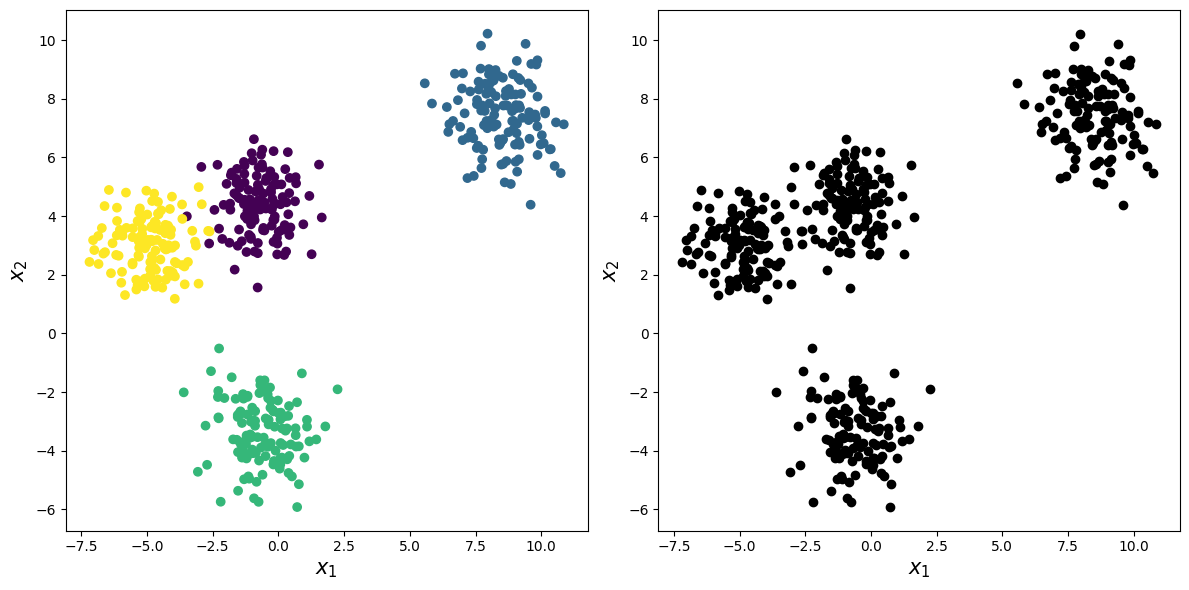

In [3]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel(r"$x_1$",size=15)        
plt.ylabel(r"$x_2$",size=15)        
plt.subplot(122)
plt.scatter(X[:,0],X[:,1],c="black")
plt.xlabel(r"$x_1$",size=15)        
plt.ylabel(r"$x_2$",size=15)   
plt.tight_layout()

In [ ]:
c = []
for k in range(2,10):
    print(f"Fitting with {k} clusters")
    c.append(KMeans(n_clusters=k,init="random").fit(X))

In [ ]:
inertias = [cc.inertia_ for cc in c]

In [ ]:
plt.scatter(range(2,10),inertias)
plt.xlabel(r"$k$",size=15)
plt.ylabel(r"$Inertia$",size=15)
plt.tight_layout()

In [ ]:
plt.figure(figsize=(17,6))
plt.subplot(131)
plt.scatter(X[:,0],X[:,1],c=c[0].predict(X))
plt.subplot(132)
plt.scatter(X[:,0],X[:,1],c=c[2].predict(X))
plt.subplot(133)
plt.scatter(X[:,0],X[:,1],c=c[-1].predict(X))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Cargar el dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Aplicar K-Means con 3 clústeres
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Reducir a 2 dimensiones para visualización usando PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualizar los resultados de K-Means
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Centroides de los clústeres
centers = kmeans.cluster_centers_
centers_pca = pca.transform(centers)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, alpha=0.5, marker='X')

# Títulos y etiquetas
plt.title('K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Mostrar gráfico
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Número de clústeres que quieres probar
n_clusters = 7  # Puedes cambiar este número

# Cargar el dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Aplicar K-Means con n_clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Reducir a 2 dimensiones para visualización usando PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualizar los resultados de K-Means
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Centroides de los clústeres
centers = kmeans.cluster_centers_
centers_pca = pca.transform(centers)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, alpha=0.5, marker='X')

# Títulos y etiquetas
plt.title(f'K-Means Clustering with {n_clusters} Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Mostrar gráfico
plt.show()


### Método del Codo (Elbow Method)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

# Cargar el dataset Iris
iris = load_iris()
X = iris.data

# Listar la inercia para diferentes valores de k
inertia = []
k_range = range(1, 11)  # Probar valores de k de 1 a 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Graficar el codo
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()


### 2. Método del Silueta (Silhouette Method)


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

# Cargar el dataset Iris
iris = load_iris()
X = iris.data

# Evaluar el índice de la silueta para diferentes valores de k
silhouette_scores = []
k_range = range(2, 11)  # Empezar desde k=2 porque el índice de la silueta no es válido para k=1

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Graficar los resultados
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Índice de Silueta')
plt.title('Método del Índice de Silueta')
plt.show()


### Jerárquico

In [ ]:
c = [AgglomerativeClustering(linkage="single",metric="euclidean",n_clusters=k).fit(X) for k in range(2,10)]


In [ ]:
plt.figure(figsize=(17,6))
plt.subplot(131)
plt.scatter(X[:,0],X[:,1],c=c[0].labels_)
plt.subplot(132)
plt.scatter(X[:,0],X[:,1],c=c[2].labels_)
plt.subplot(133)
plt.scatter(X[:,0],X[:,1],c=c[-1].labels_)